# PART 01 :BASIC EXPLORATION 

In [84]:
import glob
import os
import zipfile

zip_files = glob.glob('*.zip')

for zip_filename in zip_files:
    dir_name = os.path.splitext(zip_filename)[0]
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        zip_handler = zipfile.ZipFile(zip_filename, "r")
        zip_handler.extractall(dir_name)
    else:
        print("you have already  extracted",dir_name)

you have already  extracted test
you have already  extracted train


In [85]:
#READ DATA 

In [86]:
import glob
import cv2
import os
import numpy as np
from natsort import natsorted

from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
paths = glob.glob("train/*")
label_names = [os.path.split(x)[-1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format(label_names))
paths

Total labels: 12
Labels: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


['train\\Black-grass',
 'train\\Charlock',
 'train\\Cleavers',
 'train\\Common Chickweed',
 'train\\Common wheat',
 'train\\Fat Hen',
 'train\\Loose Silky-bent',
 'train\\Maize',
 'train\\Scentless Mayweed',
 'train\\Shepherds Purse',
 'train\\Small-flowered Cranesbill',
 'train\\Sugar beet']

#TAKE SAMPLE FROM EACH CLASS

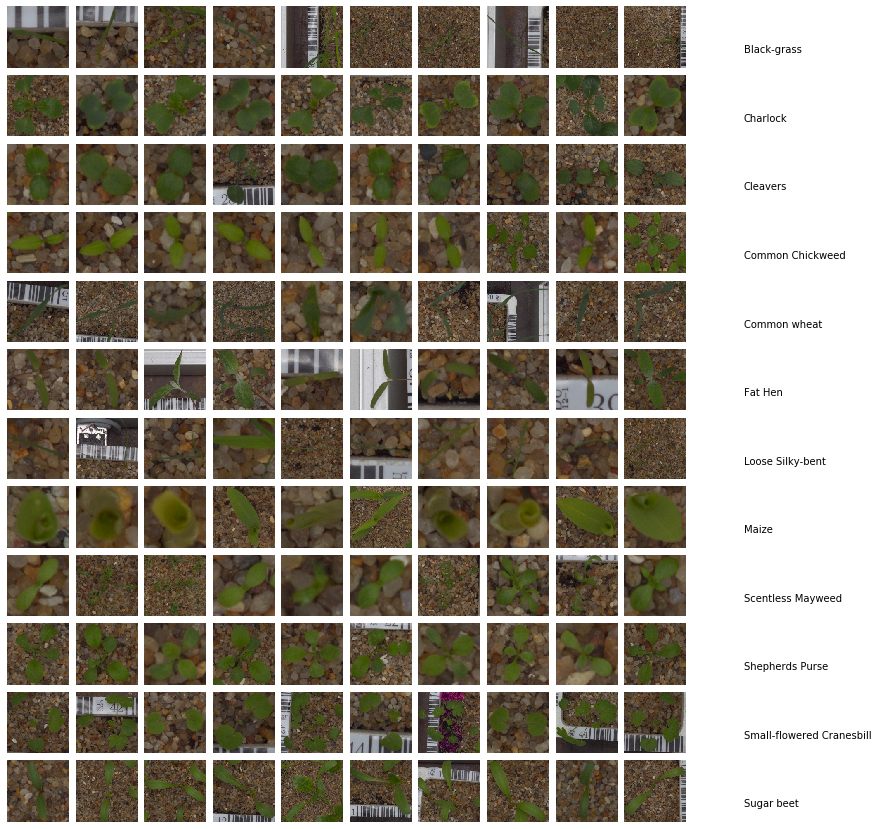

In [88]:

fig = plt.figure(1, (20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(12, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_names):
    paths = glob.glob(os.path.join("train", label, "*.png"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)
    
    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()

In [89]:
# CHECK DATA FROM EACH CLASS 
total = 0
for name, value in n_img_class:
    print("{}\t{}".format(value, name))
    total += value
    
print("\nTotal samples: {}".format(total))

263	Black-grass
390	Charlock
287	Cleavers
611	Common Chickweed
221	Common wheat
475	Fat Hen
654	Loose Silky-bent
221	Maize
516	Scentless Mayweed
231	Shepherds Purse
496	Small-flowered Cranesbill
385	Sugar beet

Total samples: 4750


In [90]:
#Split dataset into training, validation and testing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import pickle

In [91]:
images_path = natsorted(glob.glob("train/*/*"))
labels = [x.split("\\")[-2] for x in images_path]

print(images_path[:10])
print(labels[:10])

lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels[:10])
print(lb.classes_)

pickle.dump(lb, open("label.pkl", "wb"))

['train\\Black-grass\\0ace21089.png', 'train\\Black-grass\\0b3e7a7a9.png', 'train\\Black-grass\\0b228a6b8.png', 'train\\Black-grass\\0bb75ded8.png', 'train\\Black-grass\\0be707615.png', 'train\\Black-grass\\0c67c3fc3.png', 'train\\Black-grass\\0d1a9985f.png', 'train\\Black-grass\\0d4f74f4a.png', 'train\\Black-grass\\0d28c429b.png', 'train\\Black-grass\\0dad57e7f.png']
['Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass']
[0 0 0 0 0 0 0 0 0 0]
['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [92]:
#Take 250 samples from each class 
Xtr, Xte, ytr, yte = train_test_split(images_path, labels, test_size=250)
Xtr, Xval, ytr, yval = train_test_split(Xtr, ytr, test_size=250)

In [93]:
#Look at how the classes are spread across the splits, since the dataset suffers from class imbalance

counts = []
for i in [ytr, yval, yte]:
    unique, count = np.unique(i, return_counts=True)
    counts.append(count)
    
df = pd.DataFrame({"labels": unique, "train": counts[0], "val": counts[1], "test": counts[2]})
print(df)

    labels  train  val  test
0        0    230   21    12
1        1    359   16    15
2        2    256   15    16
3        3    532   28    51
4        4    189   13    19
5        5    435   24    16
6        6    589   35    30
7        7    195    9    17
8        8    469   22    25
9        9    203   20     8
10      10    452   17    27
11      11    341   30    14


In [94]:
#Some imbalance, hmmm..... Let's pickle it and see how it goes!

In [95]:
#save data in picke file
pickle.dump([(Xtr, ytr), (Xval, yval), (Xte, yte)], open("data_split.pkl", "wb"))

# PART 02 

In [96]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline
IMG_DIM = (150, 150)

In [97]:
train_files = glob.glob("train/*/*")

#IMAGES 
#EXTRACT IMAGE FROM PATH
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
#CONVERT IAGE TO ARRAY 
train_imgs = np.array(train_imgs)
#SCALE THE IMAGE AFTER CONVERTING INTO FLLOAT
train_imgs_scaled = train_imgs.astype('float32')
train_imgs_scaled /= 255

#LABELS :
#ENCODE LABEL :
# encode text category labels
train_labels = [x.split("\\")[-2] for x in images_path]
train_labels =pd.get_dummies(train_labels)
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#train_labels_enc = le.fit_transform(train_labels)

train_labels_enc=train_labels

In [98]:
s = pd.Series(list('abca'))

In [99]:
print(train_files[:10])
print(train_imgs_scaled)
print(labels[:10])
print(train_labels_enc[:10])


['train\\Black-grass\\0050f38b3.png', 'train\\Black-grass\\0183fdf68.png', 'train\\Black-grass\\0260cffa8.png', 'train\\Black-grass\\05eedce4d.png', 'train\\Black-grass\\075d004bc.png', 'train\\Black-grass\\078eae073.png', 'train\\Black-grass\\082314602.png', 'train\\Black-grass\\0ace21089.png', 'train\\Black-grass\\0b228a6b8.png', 'train\\Black-grass\\0b3e7a7a9.png']
[[[[0.3137255  0.19607843 0.10588235]
   [0.2784314  0.16470589 0.07058824]
   [0.34901962 0.25882354 0.1764706 ]
   ...
   [0.3529412  0.31764707 0.21960784]
   [0.3882353  0.3647059  0.2509804 ]
   [0.34509805 0.32156864 0.1882353 ]]

  [[0.3019608  0.1764706  0.07843138]
   [0.30588236 0.18039216 0.09019608]
   [0.34901962 0.25882354 0.1764706 ]
   ...
   [0.34901962 0.30980393 0.23137255]
   [0.35686275 0.32156864 0.23137255]
   [0.32941177 0.29411766 0.19215687]]

  [[0.32156864 0.1882353  0.09019608]
   [0.32156864 0.19607843 0.10196079]
   [0.38039216 0.28235295 0.20784314]
   ...
   [0.33333334 0.28627452 0.227450

In [100]:
X =train_imgs_scaled
y=train_labels_enc
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=4750)
#Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=250, random_state=4750)


print("All shapes")
print(Xtr.shape)
print(Xte.shape)
print(ytr.shape)
print(yte.shape)

All shapes
(4500, 150, 150, 3)
(250, 150, 150, 3)
(4500, 12)
(250, 12)


In [101]:
#VGG16 with augmentation 
train_imgs=Xtr
validation_imgs=Xte
train_labels_enc=ytr
validation_labels_enc=yte

In [102]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)




In [103]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import keras
from tensorflow.keras.models import Sequential
input_shape = (150, 150, 3)

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)

vgg_model = tf.keras.Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [104]:
#import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras import optimizers
input_shape = (150, 150, 3)
model = keras.Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_16 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 12)                6156      
Total params: 18,915,660
Trainable params: 4,200,972
Non-trainable params: 14,714,688
_________________________________________________________________


In [105]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [106]:
import keras
print(keras.__version__)

2.2.4


In [110]:
BS = 30
epochs = 2
lr = 1e-1
aug = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.2, horizontal_flip=True,
                        vertical_flip=True, rotation_range=25, fill_mode="nearest")

history = model.fit_generator(aug.flow(train_imgs, train_labels_enc, batch_size=BS), steps_per_epoch=len(train_imgs)//BS, epochs=epochs,
                              validation_data=(validation_imgs, validation_labels_enc) ,verbose=1)

Epoch 1/2
149/150 [============================>.] - ETA: 20s - loss: 14.0861

KeyError: "None of [Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,\n            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],\n           dtype='int64')] are in the [columns]"

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()